In [1]:
import pandas as pd               # Importing Pandas Library
import numpy as np                # Importing Numpy Library
import matplotlib.pyplot as plt   # Importing Matplotlib Library
import seaborn as sns             # Importing Seaborn Library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
#import warnings 
#warnings.filterwarnings('ignore') # Importing Warnings Library

In [2]:
#load data set
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# impute null values 
df['Alley'].fillna("No Alley", inplace = True)

df['MasVnrType'].fillna("None", inplace = True)
df['MasVnrArea'].fillna(0, inplace = True)

df['BsmtQual'].fillna("None", inplace = True)
df['BsmtCond'].fillna("None", inplace = True)
df['BsmtExposure'].fillna("None", inplace = True)
df['BsmtFinType1'].fillna("None", inplace = True)
df['BsmtFinType2'].fillna("None", inplace = True)

df['GarageType'].fillna("None", inplace = True)
df['GarageYrBlt'].fillna("None", inplace = True)
df['GarageFinish'].fillna("None", inplace = True)
df['GarageCars'].fillna("None", inplace = True)
df['GarageArea'].fillna("None", inplace = True)
df['GarageQual'].fillna("None", inplace = True)
df['GarageCond'].fillna("None", inplace = True)

In [5]:
# drop variables
df = df.drop(columns=['LotFrontage','FireplaceQu','PoolQC','Fence','MiscFeature','MiscVal'])

In [6]:
df = df[df['Electrical'].notna()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [8]:
df.shape

(1459, 75)

# EDA

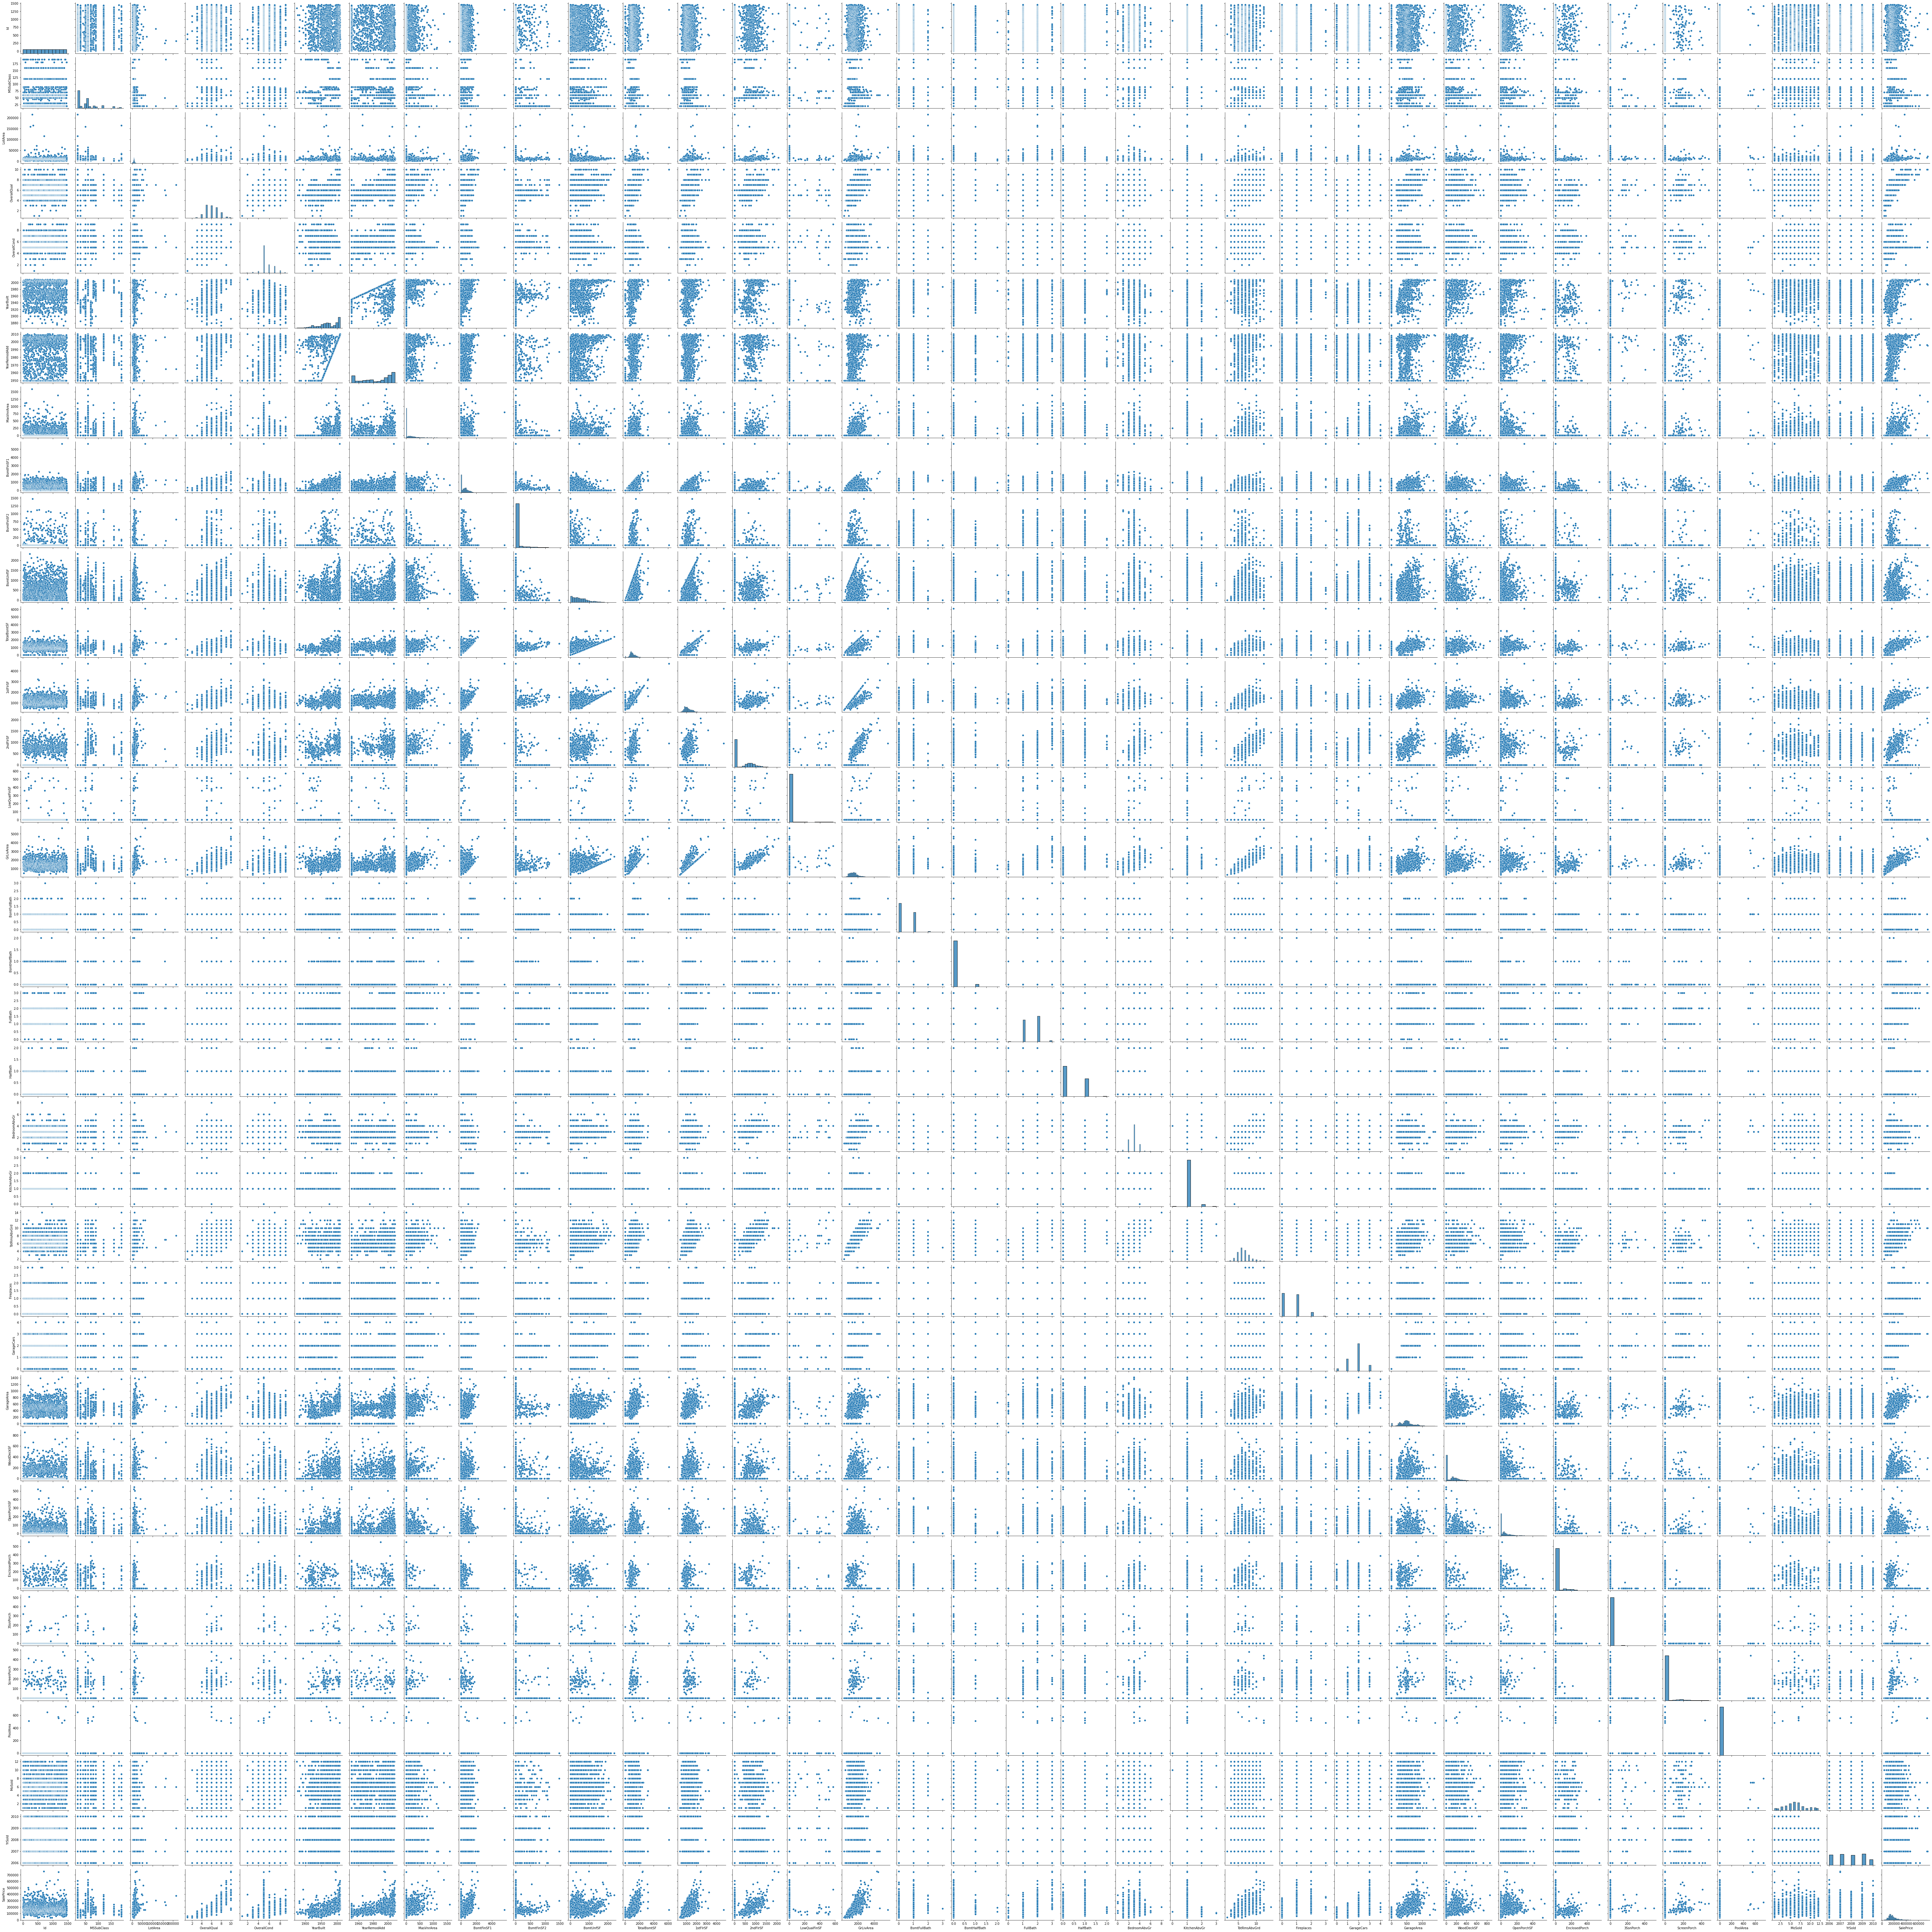

In [9]:
#look for correlation via pairplot
sns.pairplot(df)
plt.show()

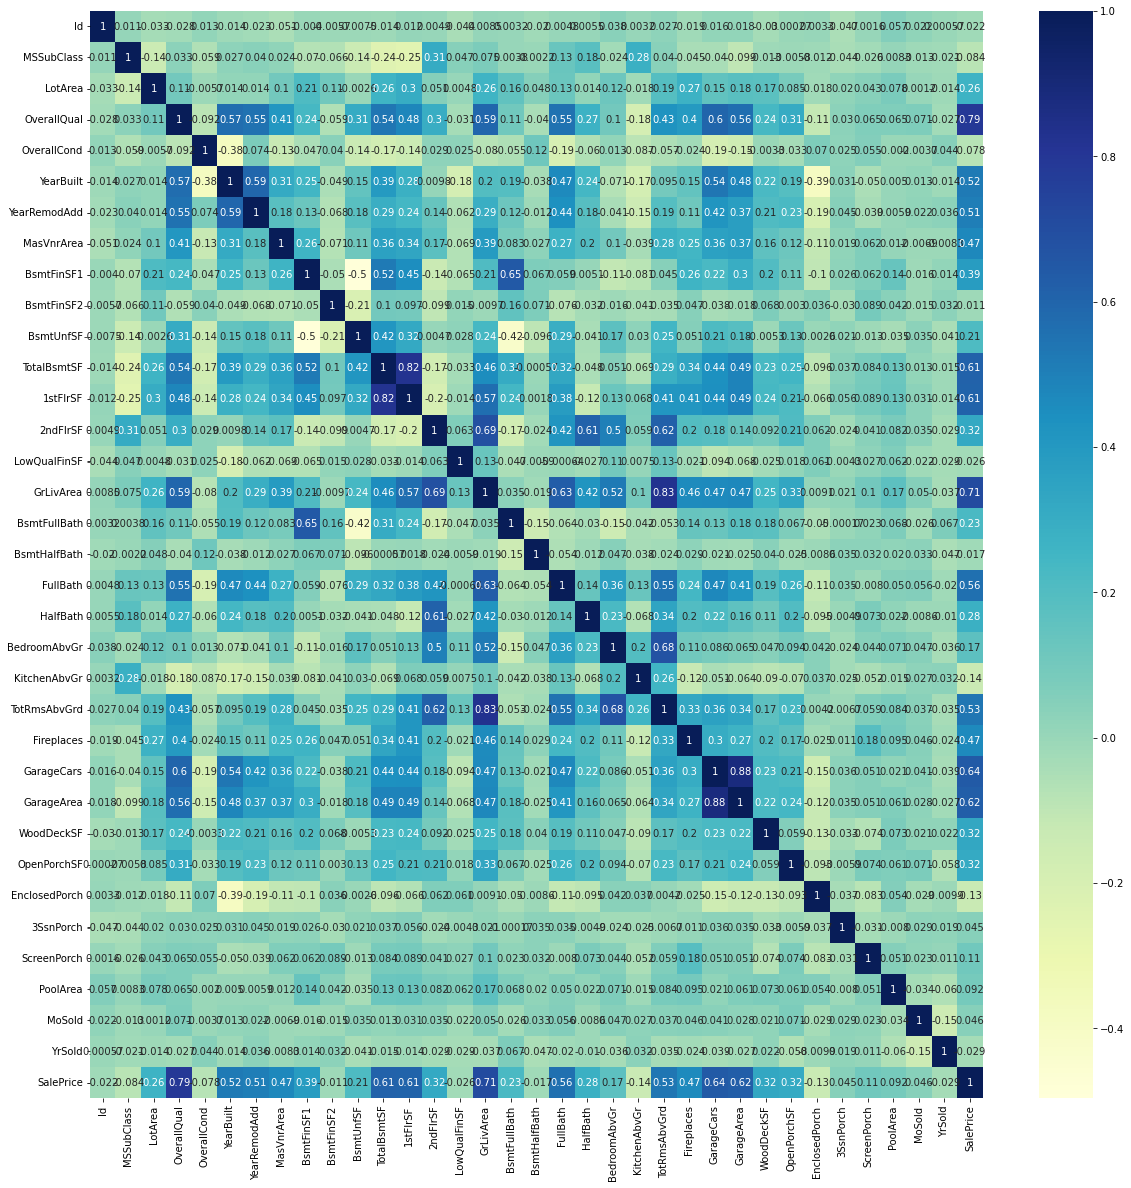

In [10]:
#check correlation between variables
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Data Preparation

## dummy variables

In [11]:
subclass = pd.get_dummies(df.MSSubClass, prefix='subclass').iloc[:, 1:]

In [12]:
zoning = pd.get_dummies(df.MSZoning, prefix='zoning').iloc[:, 1:]

In [13]:
street = pd.get_dummies(df.Street, prefix='street').iloc[:, 1:]

In [14]:
alley = pd.get_dummies(df.Alley, prefix='alley').iloc[:, 1:]

In [15]:
LotShape = pd.get_dummies(df.LotShape, prefix='LotShape').iloc[:, 1:]

In [16]:
LandContour = pd.get_dummies(df.LandContour, prefix='LandContour').iloc[:, 1:]

In [17]:
Utilities = pd.get_dummies(df.Utilities, prefix='Utilities').iloc[:, 1:]

In [18]:
LotConfig = pd.get_dummies(df.LotConfig, prefix='LotConfig').iloc[:, 1:]

In [19]:
LandSlope = pd.get_dummies(df.LandSlope, prefix='LandSlope').iloc[:, 1:]

In [20]:
Neighborhood = pd.get_dummies(df.Neighborhood, prefix='Neighborhood').iloc[:, 1:]

In [21]:
Condition1 = pd.get_dummies(df.Condition1, prefix='Condition1').iloc[:, 1:]

In [22]:
BldgType = pd.get_dummies(df.BldgType, prefix='BldgType').iloc[:, 1:]

In [23]:
HouseStyle = pd.get_dummies(df.HouseStyle, prefix='HouseStyle').iloc[:, 1:]

In [24]:
RoofStyle = pd.get_dummies(df.RoofStyle, prefix='RoofStyle').iloc[:, 1:]

In [25]:
RoofMatl = pd.get_dummies(df.RoofMatl, prefix='RoofMatl').iloc[:, 1:]

In [26]:
Exterior1st = pd.get_dummies(df.Exterior1st, prefix='Exterior1st').iloc[:, 1:]

In [27]:
MasVnrType = pd.get_dummies(df.MasVnrType, prefix='MasVnrType').iloc[:, 1:]

In [28]:
Foundation = pd.get_dummies(df.Foundation, prefix='Foundation').iloc[:, 1:]

In [29]:
BsmtQual = pd.get_dummies(df.BsmtQual, prefix='BsmtQual').iloc[:, 1:]

In [30]:
BsmtCond = pd.get_dummies(df.BsmtCond, prefix='BsmtCond').iloc[:, 1:]

In [31]:
BsmtExposure = pd.get_dummies(df.BsmtExposure, prefix='BsmtExposure').iloc[:, 1:]

In [32]:
BsmtFinType1 = pd.get_dummies(df.BsmtFinType1, prefix='BsmtFinType1').iloc[:, 1:]

In [33]:
Heating = pd.get_dummies(df.Heating, prefix='Heating').iloc[:, 1:]

In [34]:
CentralAir = pd.get_dummies(df.CentralAir, prefix='CentralAir').iloc[:, 1:]

In [35]:
Electrical = pd.get_dummies(df.Electrical, prefix='Electrical').iloc[:, 1:]

In [36]:
Functional = pd.get_dummies(df.Functional, prefix='Functional').iloc[:, 1:]

In [37]:
GarageType = pd.get_dummies(df.GarageType, prefix='GarageType').iloc[:, 1:]

In [38]:
GarageFinish = pd.get_dummies(df.GarageFinish, prefix='GarageFinish').iloc[:, 1:]

In [39]:
PavedDrive = pd.get_dummies(df.PavedDrive, prefix='PavedDrive').iloc[:, 1:]

In [40]:
SaleType = pd.get_dummies(df.SaleType, prefix='SaleType').iloc[:, 1:]

In [41]:
SaleCondition = pd.get_dummies(df.SaleCondition, prefix='SaleCondition').iloc[:, 1:]

In [42]:
categories = pd.concat([subclass, zoning, street, alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, MasVnrType, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, Heating, CentralAir, Electrical, Functional, GarageType, GarageFinish, PavedDrive, SaleType, SaleCondition],axis=1)

In [43]:
df_ints = df[['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','ScreenPorch','PoolArea']]

In [44]:
X = pd.concat((categories, df_ints) ,axis=1)
y = df['SalePrice']

In [45]:
# for question 4
#X = X.drop(columns=['GrLivArea', 'Neighborhood_NridgHt','GarageCars','Neighborhood_NoRidge','BsmtExposure_Gd'])

## train test split

In [46]:
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['subclass_30', 'subclass_40', 'subclass_45', 'subclass_50',
       'subclass_60', 'subclass_70', 'subclass_75', 'subclass_80',
       'subclass_85', 'subclass_90',
       ...
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea'],
      dtype='object', length=189)

In [47]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## standardization

In [48]:
# #instatiate an object
# scaler = MinMaxScaler()

# #
# vars_to_scale = ['LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','ScreenPorch','PoolArea','SalePrice']

# #Fit on Data
# df_train[vars_to_scale] = scaler.fit_transform(df_train[vars_to_scale])
# df_train.head()

# Model Building

## Linear Regression

In [49]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

5296706947698204.0
[-2.17150677e+03  9.76040221e+01 -4.41899391e+03 -5.90153561e+03
 -2.41343927e+03 -3.21551778e+03 -8.64296124e+03  3.79403554e+02
  5.49034063e+02  4.66578262e+17 -8.69653096e+02 -2.49681329e+03
  4.40689525e+02 -5.17724885e+17  1.14772542e+04  5.54041377e+03
  2.08866772e+04  1.71397600e+04  1.54971488e+03  1.09266216e+03
  1.40967566e+03  1.20492814e+03  8.57222863e+02  1.30408404e+03
  4.78437320e+03  1.08531051e+03  5.10657594e+03 -9.97200576e+02
  2.05371022e+03 -1.53012078e+03 -1.67596575e+03 -5.18341449e+02
 -2.28886458e+02 -2.40225299e+03 -6.16605447e+01  3.14843491e+02
  4.12562114e+02 -8.09743408e+02  1.27888910e+03  4.36725438e+03
 -4.53199528e+03 -3.45580191e+02  6.52895929e+02 -2.73821800e+03
 -2.32101781e+03 -3.64804061e+03  9.82896800e+02 -1.57464560e+03
  7.54866115e+03  1.04194691e+04 -7.68701330e+02  1.42499261e+03
 -1.47355982e+03  2.85900824e+02  3.37126838e+03  5.11700266e+03
 -4.04092961e+02  1.20230553e+03  9.54964278e+02  5.80626491e+03
  1.33

In [51]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9075931265685829
-2.180533752958044e+25
626339407481.0
5.285871004553833e+37
613456814.3790401
1.2068198640533865e+35


## polynomial regression

In [52]:
# X_poly = X_train
# poly = PolynomialFeatures(3) # can only go 3 because of memory error
# Y = poly.fit_transform(X_poly)
# print(Y)

In [53]:
# degree=3
# polyreg5 = PolynomialFeatures(degree)
# X_poly5 = polyreg5.fit_transform(X_train)
# linreg5 = LinearRegression()
# linreg5.fit(X_poly5,y_train)

In [54]:
# y_pred3 = linreg5.predict(polyreg5.fit_transform(X_train))
# print(r2_score(y_train,y_pred3))

In [55]:
# rss_poly = np.sum(np.square(y_train-y_pred3))
# print(rss_poly)
# mse_poly = mean_squared_error(y_train,y_pred3)
# print(mse_poly)
# rmse_poly  = mse**0.5
# print(rmse_poly)

## ridge regression

In [56]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [58]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.19551842e+03  1.55074173e+02  1.99845520e+02 -2.77101700e+02
  1.21002420e+03  4.78433567e+02 -1.42089126e+02 -9.32980074e+02
 -3.23426127e+02 -1.12813579e+03 -1.06606493e+03 -1.91580682e+03
 -5.18992970e+02 -9.81992515e+02  1.22439311e+03  2.48385095e+02
  1.49915970e+03 -1.16395786e+03  1.62558374e+03  7.10257922e+02
  7.80051042e+02  7.26553015e+02 -2.27152731e+03 -7.63931201e+02
  2.36635633e+03  1.86212891e+02  1.49563109e+03 -9.90037650e+02
  1.93179272e+03 -9.09682739e+02 -5.75978630e+02 -5.10836444e+02
  1.76066989e+02 -4.27758929e+02 -6.00268873e+01 -1.38345817e+02
 -1.28306792e+02 -7.13627290e+01 -5.08386585e+02  2.75048876e+03
 -3.81648830e+03 -1.69497963e+03 -1.09401367e+03 -2.14773087e+03
 -1.68406092e+03 -2.66609854e+03 -2.11653339e+02 -1.33925357e+03
  7.06487420e+03  8.30727806e+03 -1.27953098e+03 -2.58957027e+02
 -1.30800492e+03 -3.19166405e+02  1.91026001e+03  3.42042635e+03
  2.75794982e+01  1.25243512e+03 -1.96569429e+03  2.49222263e+03
  8.48679832e+02 -1.93320

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8535234447798958
0.8517593538258162
992826998681.0991
359352810863.60657
972406462.9589609
820440207.4511565


## Lasso Regression

In [60]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e+11, tolerance: 5.232e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+11, tolerance: 5.346e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.945e+11, toleranc

C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.682e+10, tolerance: 5.346e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+11, tolerance: 5.487e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.371e+11, toleranc

C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.996e+10, tolerance: 5.346e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.279e+10, tolerance: 5.487e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.041e+11, toleranc

C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+09, tolerance: 5.487e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.528e+10, tolerance: 5.771e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\fidel\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.684e+10, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [62]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8621631807310466
0.8474451641074903
934266343012.4243
369810915586.5019
915050286.9857241
844317158.873292


## evaluation

In [64]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.075931e-01      8.535234e-01      8.621632e-01
1   R2 Score (Test)      -2.180534e+25      8.517594e-01      8.474452e-01
2       RSS (Train)       6.263394e+11      9.928270e+11      9.342663e+11
3        RSS (Test)       5.285871e+37      3.593528e+11      3.698109e+11
4       MSE (Train)       2.476806e+04      3.118343e+04      3.024980e+04
5        MSE (Test)       3.473931e+17      2.864333e+04      2.905714e+04

In [65]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

C:\Users\fidel\AppData\Local\Temp\ipykernel_11868\1380884475.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


Linear         Ridge         Lasso
subclass_30           -2.171507e+03 -1.195518e+03     -0.000000
subclass_40            9.760402e+01  1.550742e+02      0.000000
subclass_45           -4.418994e+03  1.998455e+02      0.000000
subclass_50           -5.901536e+03 -2.771017e+02     -0.000000
subclass_60           -2.413439e+03  1.210024e+03      0.000000
subclass_70           -3.215518e+03  4.784336e+02     -0.000000
subclass_75           -8.642961e+03 -1.420891e+02     -0.000000
subclass_80            3.794036e+02 -9.329801e+02     -0.000000
subclass_85            5.490341e+02 -3.234261e+02      0.000000
subclass_90            4.665783e+17 -1.128136e+03     -0.000000
subclass_120          -8.696531e+02 -1.066065e+03    -32.978142
subclass_160          -2.496813e+03 -1.915807e+03  -1584.421286
subclass_180           4.406895e+02 -5.189930e+02     -0.000000
subclass_190          -5.177249e+17 -9.819925e+02   -203.288249
zoning_FV              1.147725e+04  1.224393e+03      0.000000
zoning_RH              5.540414e+03  2.483851e+02      0.000000
zoning_RL              2.088668e+04  1.499160e+03   1282.265543
zoning_RM              1.713976e+04 -1.163958e+03   -464.057061
street_Pave            1.549715e+03  1.625584e+03   1288.765663
alley_No Alley         1.092662e+03  7.102579e+02      0.000000
alley_Pave             1.409676e+03  7.800510e+02      0.000000
LotShape_IR2           1.204928e+03  7.265530e+02    219.278437
LotShape_IR3           8.572229e+02 -2.271527e+03  -1931.095246
LotShape_Reg           1.304084e+03 -7.639312e+02     -0.000000
LandContour_HLS        4.784373e+03  2.366356e+03   2297.326797
LandContour_Low        1.085311e+03  1.862129e+02      0.000000
LandContour_Lvl        5.106576e+03  1.495631e+03   1145.717885
Utilities_NoSeWa      -9.972006e+02 -9.900377e+02   -396.086917
LotConfig_CulDSac      2.053710e+03  1.931793e+03   2410.997105
LotConfig_FR2         -1.530121e+03 -9.096827e+02     -5.326863
LotConfig_FR3         -1.675966e+03 -5.759786e+02   -312.939366
LotConfig_Inside      -5.183414e+02 -5.108364e+02     -0.000000
LandSlope_Mod         -2.288865e+02  1.760670e+02     -0.000000
LandSlope_Sev         -2.402253e+03 -4.277589e+02      0.000000
Neighborhood_Blueste  -6.166054e+01 -6.002689e+01     -0.000000
Neighborhood_BrDale    3.148435e+02 -1.383458e+02      0.000000
Neighborhood_BrkSide   4.125621e+02 -1.283068e+02      0.000000
Neighborhood_ClearCr  -8.097434e+02 -7.136273e+01      0.000000
Neighborhood_CollgCr   1.278889e+03 -5.083866e+02   1182.709803
Neighborhood_Crawfor   4.367254e+03  2.750489e+03   3517.682315
Neighborhood_Edwards  -4.531995e+03 -3.816488e+03  -3942.644700
Neighborhood_Gilbert  -3.455802e+02 -1.694980e+03     -0.000000
Neighborhood_IDOTRR    6.528959e+02 -1.094014e+03   -620.179184
Neighborhood_MeadowV  -2.738218e+03 -2.147731e+03  -1247.157360
Neighborhood_Mitchel  -2.321018e+03 -1.684061e+03   -681.269318
Neighborhood_NAmes    -3.648041e+03 -2.666099e+03   -630.632498
Neighborhood_NPkVill   9.828968e+02 -2.116533e+02      0.000000
Neighborhood_NWAmes   -1.574646e+03 -1.339254e+03     -0.000000
Neighborhood_NoRidge   7.548661e+03  7.064874e+03   9702.718035
Neighborhood_NridgHt   1.041947e+04  8.307278e+03  12751.967853
Neighborhood_OldTown  -7.687013e+02 -1.279531e+03   -892.857986
Neighborhood_SWISU     1.424993e+03 -2.589570e+02     -0.000000
Neighborhood_Sawyer   -1.473560e+03 -1.308005e+03     -0.000000
Neighborhood_SawyerW   2.859008e+02 -3.191664e+02      0.000000
Neighborhood_Somerst   3.371268e+03  1.910260e+03   5639.815709
Neighborhood_StoneBr   5.117003e+03  3.420426e+03   4650.322315
Neighborhood_Timber   -4.040930e+02  2.757950e+01      0.000000
Neighborhood_Veenker   1.202306e+03  1.252435e+03    995.421780
Condition1_Feedr       9.549643e+02 -1.965694e+03  -1443.452046
Condition1_Norm        5.806265e+03  2.492223e+03   3190.804592
Condition1_PosA        1.338862e+03  8.486798e+02    624.331516
Condition1_PosN       -3.237182e+03 -1.933204e+03  -1755.8634

In [66]:
# These are the factors that affect the price of houses
betas['Ridge'].sort_values(ascending = False)

GrLivArea                8.642534e+03
Neighborhood_NridgHt     8.307278e+03
Neighborhood_NoRidge     7.064874e+03
1stFlrSF                 6.398568e+03
GarageCars               5.505965e+03
RoofMatl_WdShngl         5.450419e+03
BsmtExposure_Gd          5.296518e+03
TotalBsmtSF              5.198748e+03
FullBath                 5.151814e+03
TotRmsAbvGrd             5.104586e+03
2ndFlrSF                 4.909986e+03
MasVnrArea               4.543011e+03
GarageArea               4.383414e+03
BsmtFinType1_GLQ         4.270050e+03
Fireplaces               4.233137e+03
Neighborhood_StoneBr     3.420426e+03
Foundation_PConc         2.760021e+03
Neighborhood_Crawfor     2.750489e+03
BsmtFullBath             2.653054e+03
Condition1_Norm          2.492223e+03
LotArea                  2.387308e+03
LandContour_HLS          2.366356e+03
WoodDeckSF               2.302408e+03
HalfBath                 2.198424e+03
Exterior1st_BrkFace      2.193903e+03
SaleType_New             2.097111e+03
CentralAir_Y

In [67]:
# These are the factors that affect the price of houses
betas['Lasso'].sort_values(ascending = False)

GrLivArea                26974.716924
Neighborhood_NridgHt     12751.967853
GarageCars                9729.528831
Neighborhood_NoRidge      9702.718035
BsmtExposure_Gd           7153.316067
RoofMatl_WdShngl          7130.316339
Neighborhood_Somerst      5639.815709
TotalBsmtSF               5157.039542
Neighborhood_StoneBr      4650.322315
FullBath                  4601.250983
BsmtFinType1_GLQ          4542.443665
Functional_Typ            3772.632015
SaleType_New              3553.099463
Fireplaces                3528.586456
Neighborhood_Crawfor      3517.682315
Foundation_PConc          3246.863420
Condition1_Norm           3190.804592
RoofMatl_CompShg          2951.747350
BsmtFullBath              2816.286767
TotRmsAbvGrd              2608.754308
LotConfig_CulDSac         2410.997105
LandContour_HLS           2297.326797
Exterior1st_BrkFace       2166.666840
CentralAir_Y              2161.641409
MasVnrArea                2126.663445
Exterior1st_VinylSd       1991.864351
HouseStyle_1